In [ ]:
import json

# Open and read the JSON file
with open('participants.json', 'r') as file:
    data = json.load(file)

# Print the data in a human-readable format
print(json.dumps(data, indent=4))

{
    "participant_id": {
        "Description": "unique participant identifier"
    },
    "age": {
        "Description": "age of the participant in years"
    },
    "sex": {
        "Description": "sex of the participant: m - male, f - female"
    },
    "hand": {
        "Description": "dominant hand: l - left, r - right, b - ambidextrous"
    },
    "eye": {
        "Description": "dominant eye: l - left, r - right"
    },
    "NASA_cog_1": {
        "Description": "NASA Task Load Index: Mental Demand scale; administered after 3 blocks of 18 trials"
    },
    "NASA_phys_1": {
        "Description": "NASA Task Load Index: Physical Demand scale; administered after 3 blocks of 18 trials"
    },
    "NASA_speed_1": {
        "Description": "NASA Task Load Index: Temporal Demand scale; administered after 3 blocks of 18 trials"
    },
    "NASA_perf_1": {
        "Description": "NASA Task Load Index: Overall Performance scale; administered after 3 blocks of 18 trials"
    },
    "NASA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the TSV file
file_path = "/content/participants.tsv"
data = pd.read_csv(file_path, sep='\t')

In [ ]:
print(data.head())

  participant_id  age sex hand eye  NASA_cog_1  NASA_phys_1  NASA_speed_1  \
0        sub-013   18   m    r   r          15           12            15   
1        sub-014   21   f    r   r          13            6            10   
2        sub-015   22   f    r   l          16            5            11   
3        sub-016   20   f    r   l          17            2             4   
4        sub-017   44   m    r   r          17            3            10   

   NASA_perf_1  NASA_effort_1  ...  NASA_cog_3  NASA_phys_3  NASA_speed_3  \
0           17             13  ...          14         13.0            11   
1           11             16  ...          15         11.0            10   
2           14             16  ...          13         12.0             5   
3           16             15  ...          18         15.0             5   
4           10             16  ...          19         12.0            10   

   NASA_perf_3  NASA_effort_3  NASA_dissap_3  EEG_excluded  ECG_excluded  

      count       mean       std   min    25%   50%   75%   max
hand                                                           
b       3.0  19.666667  1.154701  19.0  19.00  19.0  20.0  21.0
l       6.0  19.833333  0.752773  19.0  19.25  20.0  20.0  21.0
r      77.0  20.623377  4.110445  18.0  19.00  20.0  21.0  44.0


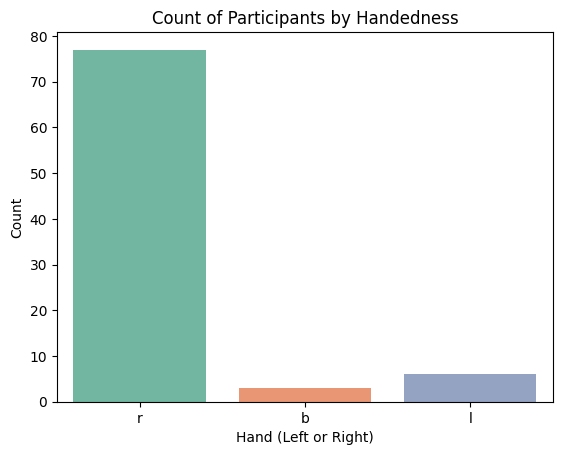

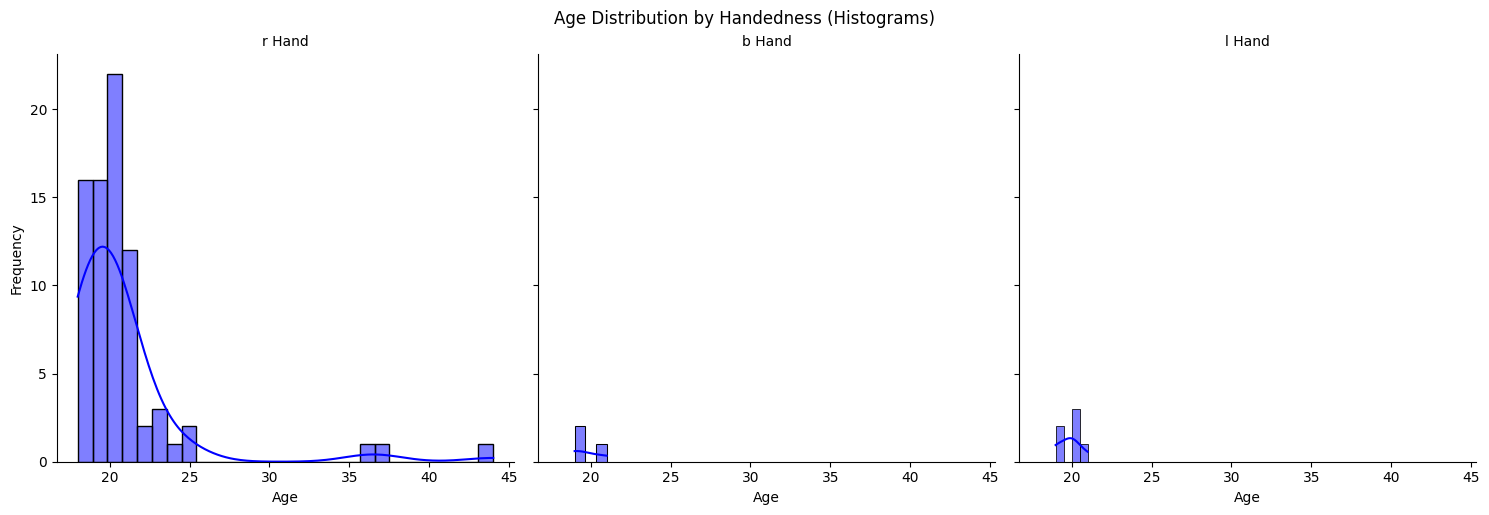

In [ ]:
# Group by 'hand' and analyze with age
hand_age_group = data.groupby('hand')['age'].describe()
print(hand_age_group)

# Bar plot: Count of participants based on handedness
sns.countplot(data=data, x='hand', hue='hand', palette='Set2', dodge=False, legend=False)
plt.title('Count of Participants by Handedness')
plt.xlabel('Hand (Left or Right)')
plt.ylabel('Count')
plt.show()

# Plot histograms of age, split by handedness
g = sns.FacetGrid(data, col="hand", height=5, aspect=1, sharey=True)
g.map(sns.histplot, "age", kde=True, color="blue")
g.set_axis_labels("Age", "Frequency")
g.set_titles("{col_name} Hand")
plt.suptitle('Age Distribution by Handedness (Histograms)', y=1.02)
plt.show()


count    86.000000
mean     20.534884
std       3.903837
min      18.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      44.000000
Name: age, dtype: float64


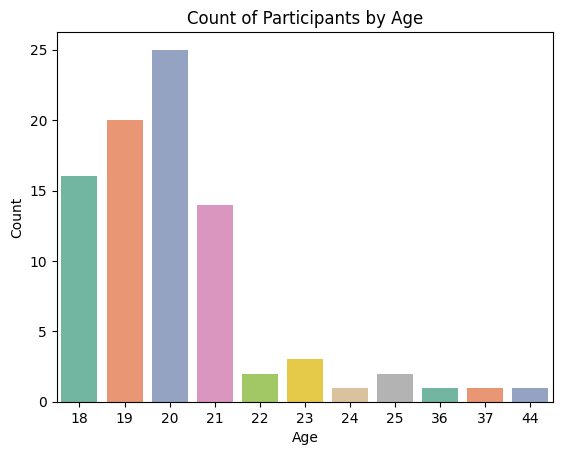

In [ ]:
print(data["age"].describe())

# Bar plot: Count of participants based on age
sns.countplot(data=data, x='age', hue='age', palette='Set2', dodge=False, legend=False)
plt.title('Count of Participants by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


     count       mean       std   min   25%   50%   75%   max
eye                                                          
l     25.0  20.000000  1.527525  18.0  19.0  20.0  21.0  24.0
r     61.0  20.754098  4.526425  18.0  19.0  20.0  21.0  44.0


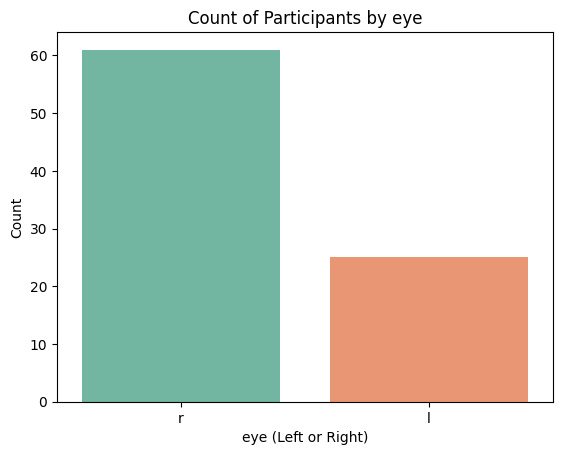

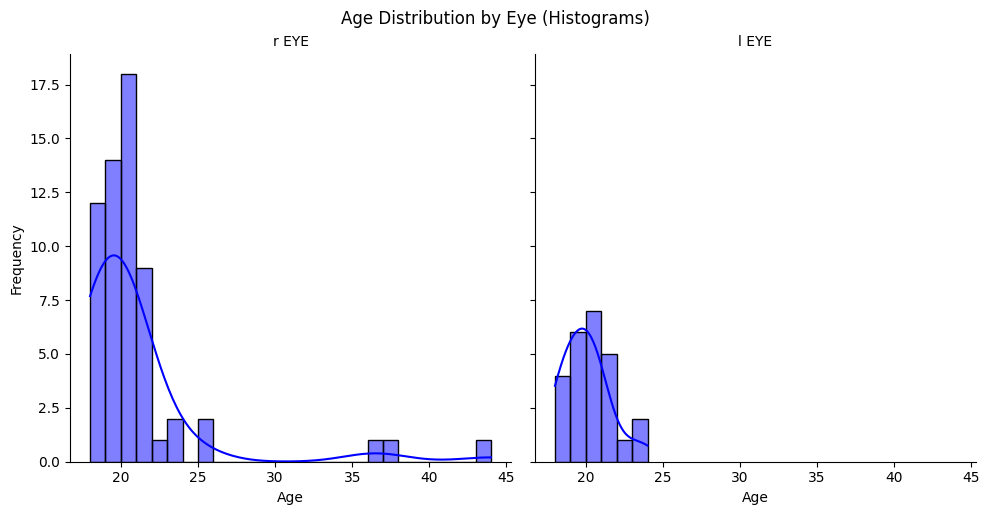

In [ ]:
# Group by 'eye' and analyze with age
eye_age_group = data.groupby('eye')['age'].describe()
print(eye_age_group)

# Bar plot: Count of participants based on handedness
sns.countplot(data=data, x='eye', hue='eye', palette='Set2', dodge=False, legend=False)
plt.title('Count of Participants by eye')
plt.xlabel('eye (Left or Right)')
plt.ylabel('Count')
plt.show()

# Plot histograms of age, split by handedness
g = sns.FacetGrid(data, col="eye", height=5, aspect=1, sharey=True)
g.map(sns.histplot, "age", kde=True, color="blue")
g.set_axis_labels("Age", "Frequency")
g.set_titles("{col_name} EYE")
plt.suptitle('Age Distribution by Eye (Histograms)', y=1.02)
plt.show()


eye    l   r
hand        
b      1   2
l      2   4
r     22  55


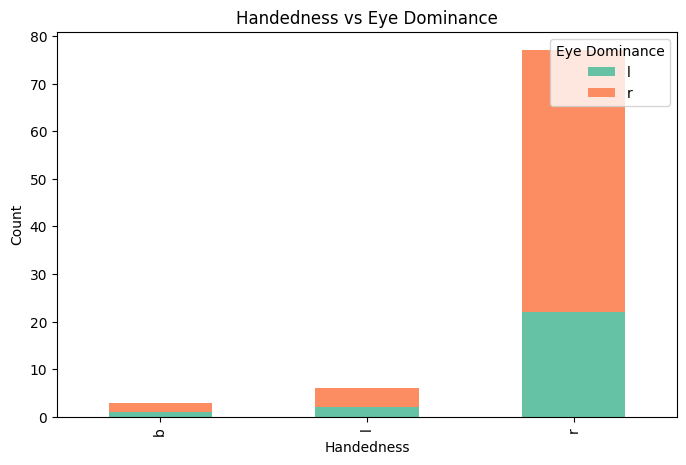

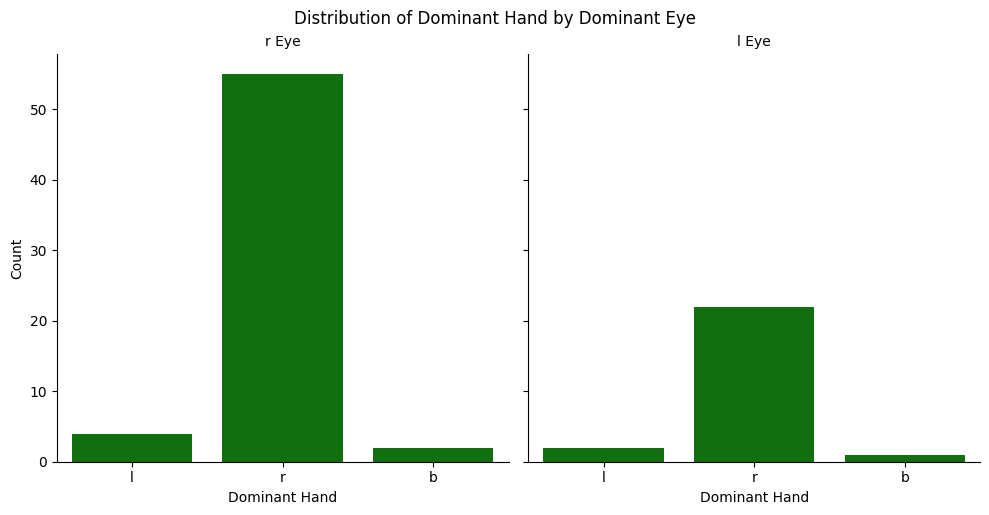

In [ ]:
# hand and eye dominance
hand_eye_ct = pd.crosstab(data['hand'], data['eye'])
print(hand_eye_ct)

# Plot stacked bar chart
hand_eye_ct.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(8, 5))
plt.title('Handedness vs Eye Dominance')
plt.xlabel('Handedness')
plt.ylabel('Count')
plt.legend(title='Eye Dominance', loc='upper right')
plt.show()





hand  sex
b     f       2
      m       1
l     f       5
      m       1
r     f      67
      m      10
dtype: int64


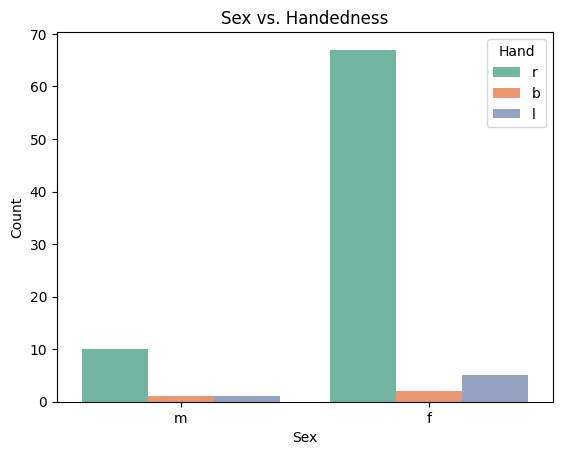

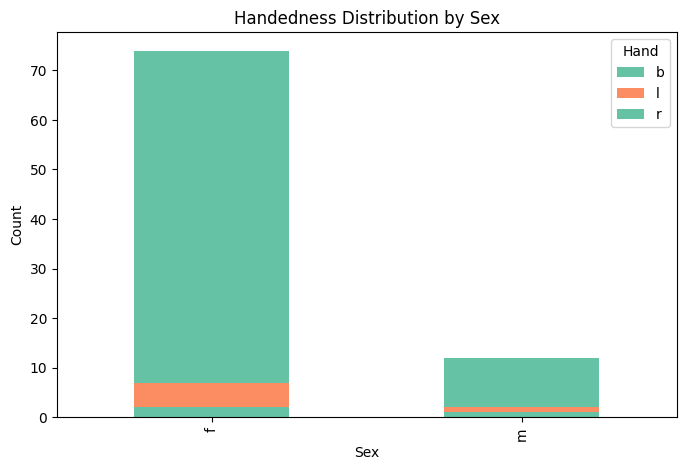

In [ ]:
# Group by 'hand' and analyze with sex
hand_sex_group = data.groupby(['hand', 'sex']).size()
print(hand_sex_group)

sns.countplot(data=data, x='sex', hue='hand', palette='Set2')
plt.title('Sex vs. Handedness')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Hand', loc='upper right')
plt.show()

# Group by 'sex' and 'hand' for counts
handedness_sex_counts = data.groupby(['sex', 'hand']).size().unstack()

# Plot the stacked bar chart
handedness_sex_counts.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(8, 5))
plt.title('Handedness Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Hand', loc='upper right')
plt.show()

count     86
unique     2
top        f
freq      74
Name: sex, dtype: object


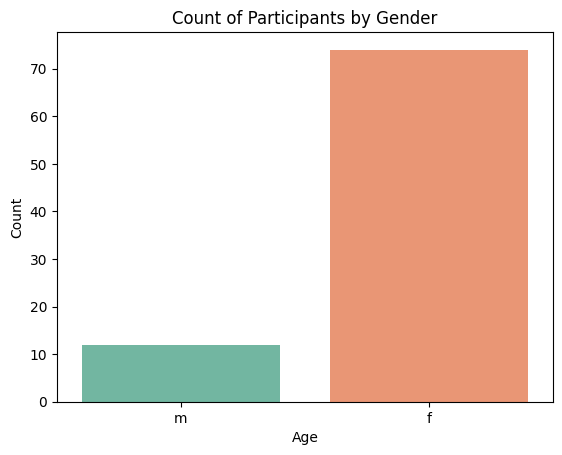

In [ ]:
print(data["sex"].describe())

# Bar plot: Count of participants based on age
sns.countplot(data=data, x='sex', hue='sex', palette='Set2', dodge=False, legend=False)
plt.title('Count of Participants by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sex  eye
f    l      25
     r      49
m    r      12
dtype: int64


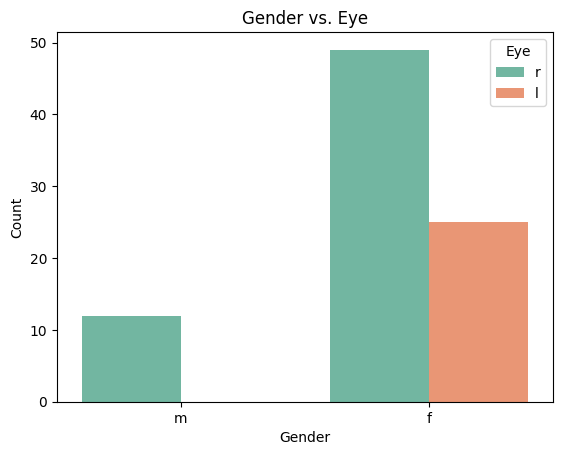

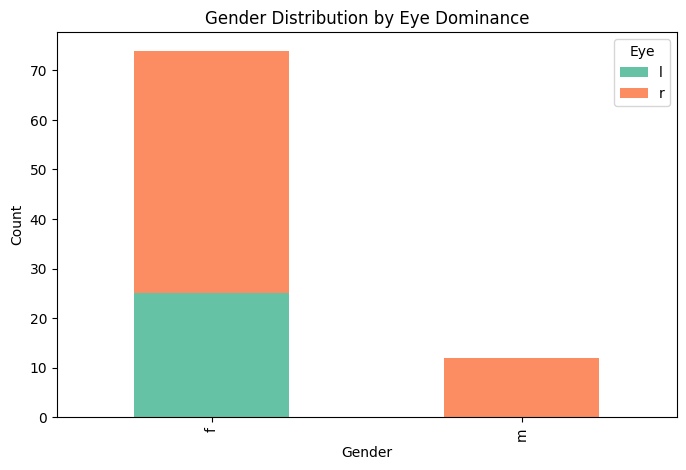

In [ ]:
# Group by 'sex' and 'eye' for counts
eye_sex_counts = data.groupby(['sex', 'eye']).size()
print(eye_sex_counts)

sns.countplot(data=data, x='sex', hue='eye', palette='Set2')
plt.title('Gender vs. Eye')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Eye', loc='upper right')
plt.show()

# Group by 'sex' and 'eye' for counts
eye_sex_counts = data.groupby(['sex', 'eye']).size().unstack()

# Plot the stacked bar chart
eye_sex_counts.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(8, 5))
plt.title('Gender Distribution by Eye Dominance')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Eye', loc='upper right')
plt.show()

eye         l   r   
sex         f   f  m
age_group           
0-20       17  37  7
21-30       8  10  4
31-40       0   2  0
41-50       0   0  1


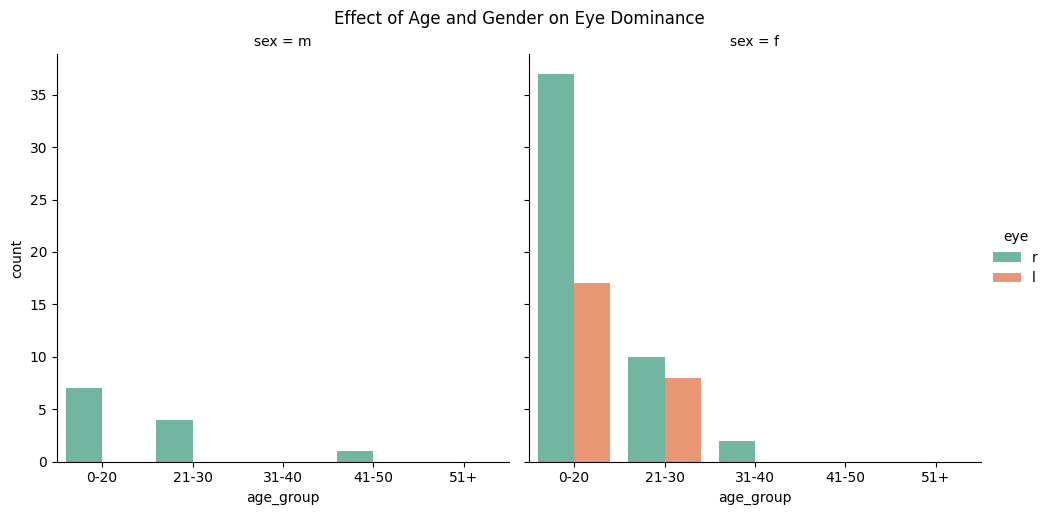

In [ ]:
#age and sex both affect eye dominance

# Create age bins
bins = [0, 20, 30, 40, 50, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Cross-tabulate eye dominance with sex and age group
eye_sex_age = pd.crosstab(index=data['age_group'], columns=[data['eye'], data['sex']])
print(eye_sex_age)

sns.catplot(
    data=data, x='age_group', hue='eye', col='sex',
    kind='count', palette='Set2', height=5, aspect=1
)
plt.suptitle('Effect of Age and Gender on Eye Dominance', y=1.02)
plt.show()


hand       b     l      r   
sex        f  m  f  m   f  m
age_group                   
0-20       2  0  4  1  48  6
21-30      0  1  1  0  17  3
31-40      0  0  0  0   2  0
41-50      0  0  0  0   0  1


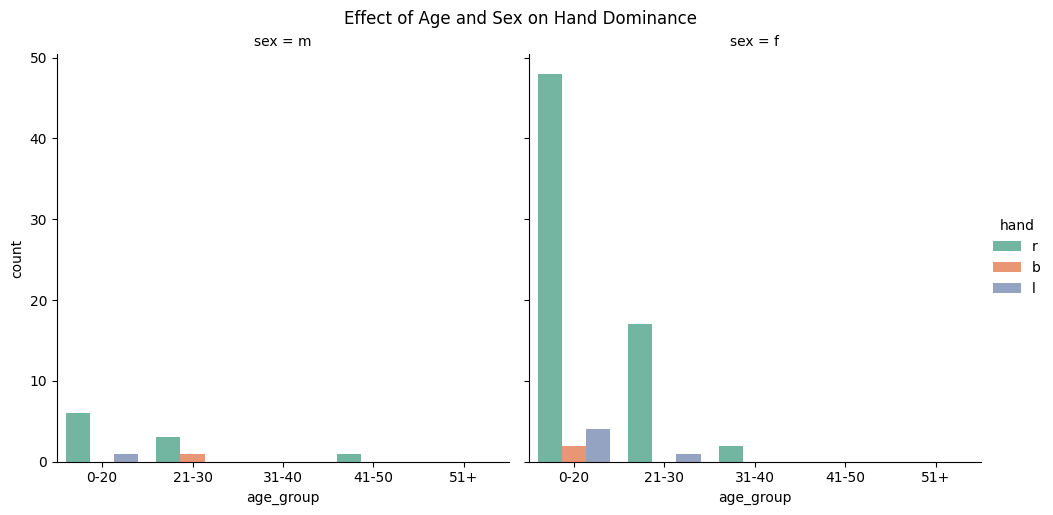

In [ ]:
#age and sex both affect hand dominance

# Create age bins
bins = [0, 20, 30, 40, 50, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Cross-tabulate hand dominance with sex and age group
hand_sex_age = pd.crosstab(index=data['age_group'], columns=[data['hand'], data['sex']])
print(hand_sex_age)

sns.catplot(
    data=data, x='age_group', hue='hand', col='sex',
    kind='count', palette='Set2', height=5, aspect=1
)
plt.suptitle('Effect of Age and Sex on Hand Dominance', y=1.02)
plt.show()

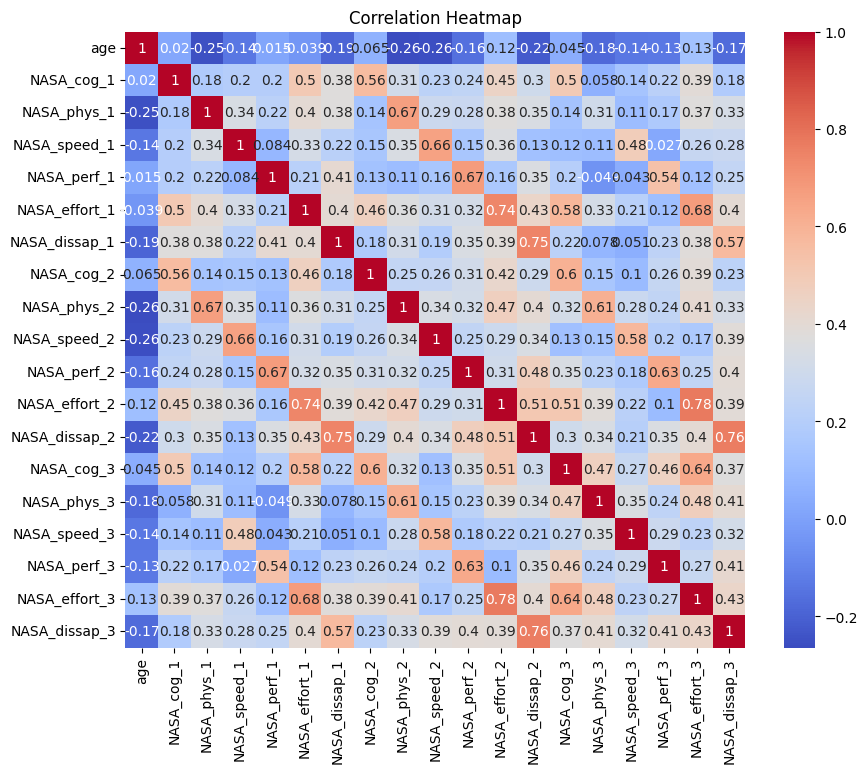

In [ ]:
# Select numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number']) # Add this line to create 'numeric_data'

# 1. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# List of related columns for NASA components
nasa_columns = {
    'NASA_cog': ['NASA_cog_1', 'NASA_cog_2', 'NASA_cog_3'],
    'NASA_phys': ['NASA_phys_1', 'NASA_phys_2', 'NASA_phys_3'],
    'NASA_speed': ['NASA_speed_1', 'NASA_speed_2', 'NASA_speed_3'],
    'NASA_perf': ['NASA_perf_1', 'NASA_perf_2', 'NASA_perf_3'],
    'NASA_effort': ['NASA_effort_1', 'NASA_effort_2', 'NASA_effort_3'],
    'NASA_dissap': ['NASA_dissap_1', 'NASA_dissap_2', 'NASA_dissap_3'],
}

# Compute averages for each category
for key, cols in nasa_columns.items():
    data[f'{key}_avg'] = data[cols].mean(axis=1)

# Display the dataset with the new columns
print(data.head())


  participant_id  age sex hand eye  NASA_cog_1  NASA_phys_1  NASA_speed_1  \
0        sub-013   18   m    r   r          15           12            15   
1        sub-014   21   f    r   r          13            6            10   
2        sub-015   22   f    r   l          16            5            11   
3        sub-016   20   f    r   l          17            2             4   
4        sub-017   44   m    r   r          17            3            10   

   NASA_perf_1  NASA_effort_1  ...  EEG_excluded  ECG_excluded  \
0           17             13  ...           yes            no   
1           11             16  ...           yes            no   
2           14             16  ...           yes            no   
3           16             15  ...           yes            no   
4           10             16  ...           yes           yes   

   pupil_excluded  behavior_excluded  NASA_cog_avg  NASA_phys_avg  \
0              no                 no     15.000000      13.666667   
1 

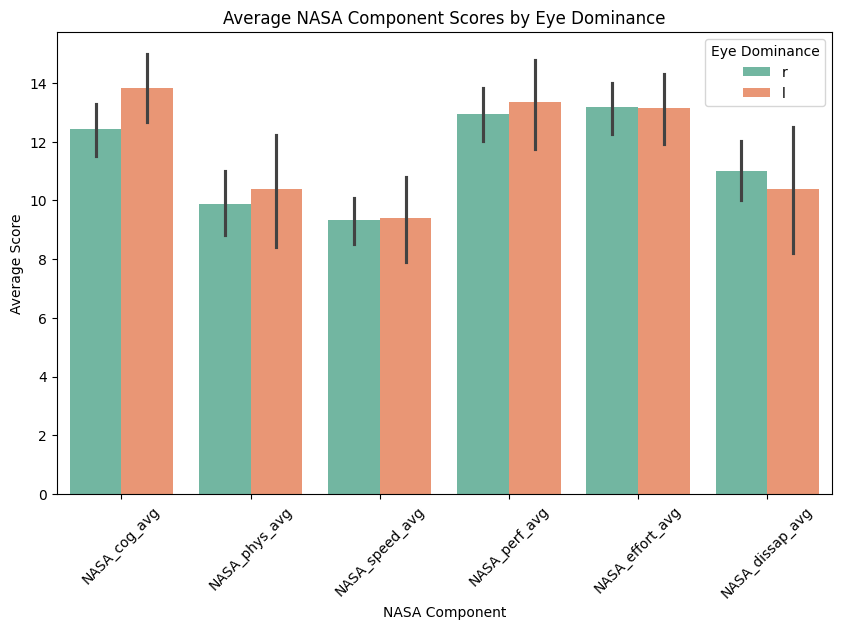

In [ ]:
#Average NASA Scores by a Category - eg: Eye Dominance):
# Melt the data for visualization
avg_columns = [f'{key}_avg' for key in nasa_columns.keys()]
melted_data = data.melt(id_vars='eye', value_vars=avg_columns,
                        var_name='NASA_Component', value_name='Average_Score')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='NASA_Component', y='Average_Score', hue='eye', palette='Set2')
plt.title('Average NASA Component Scores by Eye Dominance')
plt.xlabel('NASA Component')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Eye Dominance')
plt.show()


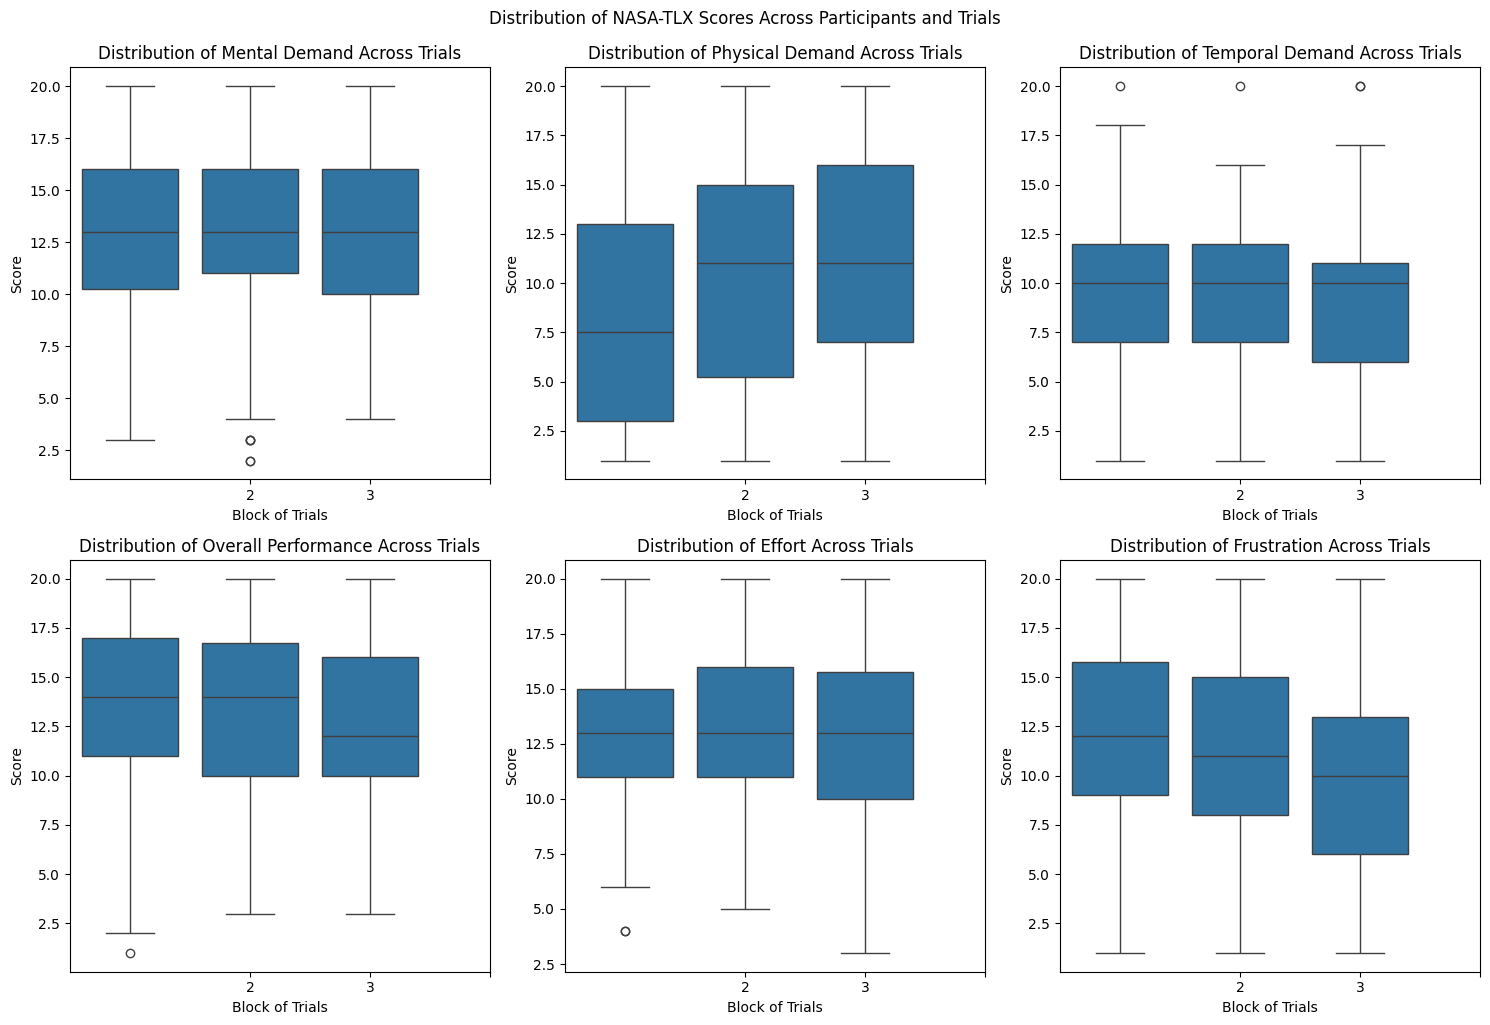

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file into a pandas DataFrame
try:
    df = pd.read_csv('/content/participants.tsv', sep='\t')
except FileNotFoundError:
    print("Error: '/content/participants.tsv' not found. Please make sure the file is in the correct directory.")
    exit()

# Identify the NASA-TLX column prefixes and scales
nasa_tlx_scales = {
    'NASA_cog': 'Mental Demand',
    'NASA_phys': 'Physical Demand',
    'NASA_speed': 'Temporal Demand',
    'NASA_perf': 'Overall Performance',
    'NASA_effort': 'Effort',
    'NASA_dissap': 'Frustration'
}

# Create box plots for each NASA-TLX scale at each time point
plt.figure(figsize=(15, 10))
for i, (prefix, scale_name) in enumerate(nasa_tlx_scales.items()):
    plt.subplot(2, 3, i + 1)
    # Melt the DataFrame to long format for the current scale
    melted_df = pd.melt(df, id_vars=['participant_id'],
                        value_vars=[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'],
                        var_name='time_point', value_name='score')
    # Extract the time point number
    melted_df['time_point'] = melted_df['time_point'].str[-1].astype(int)
    sns.boxplot(data=melted_df, x='time_point', y='score')
    plt.title(f'Distribution of {scale_name} Across Trials')
    plt.xlabel('Block of Trials')
    plt.ylabel('Score')
    plt.xticks([1, 2, 3])
plt.tight_layout()
plt.suptitle('Distribution of NASA-TLX Scores Across Participants and Trials', y=1.02)
plt.show()

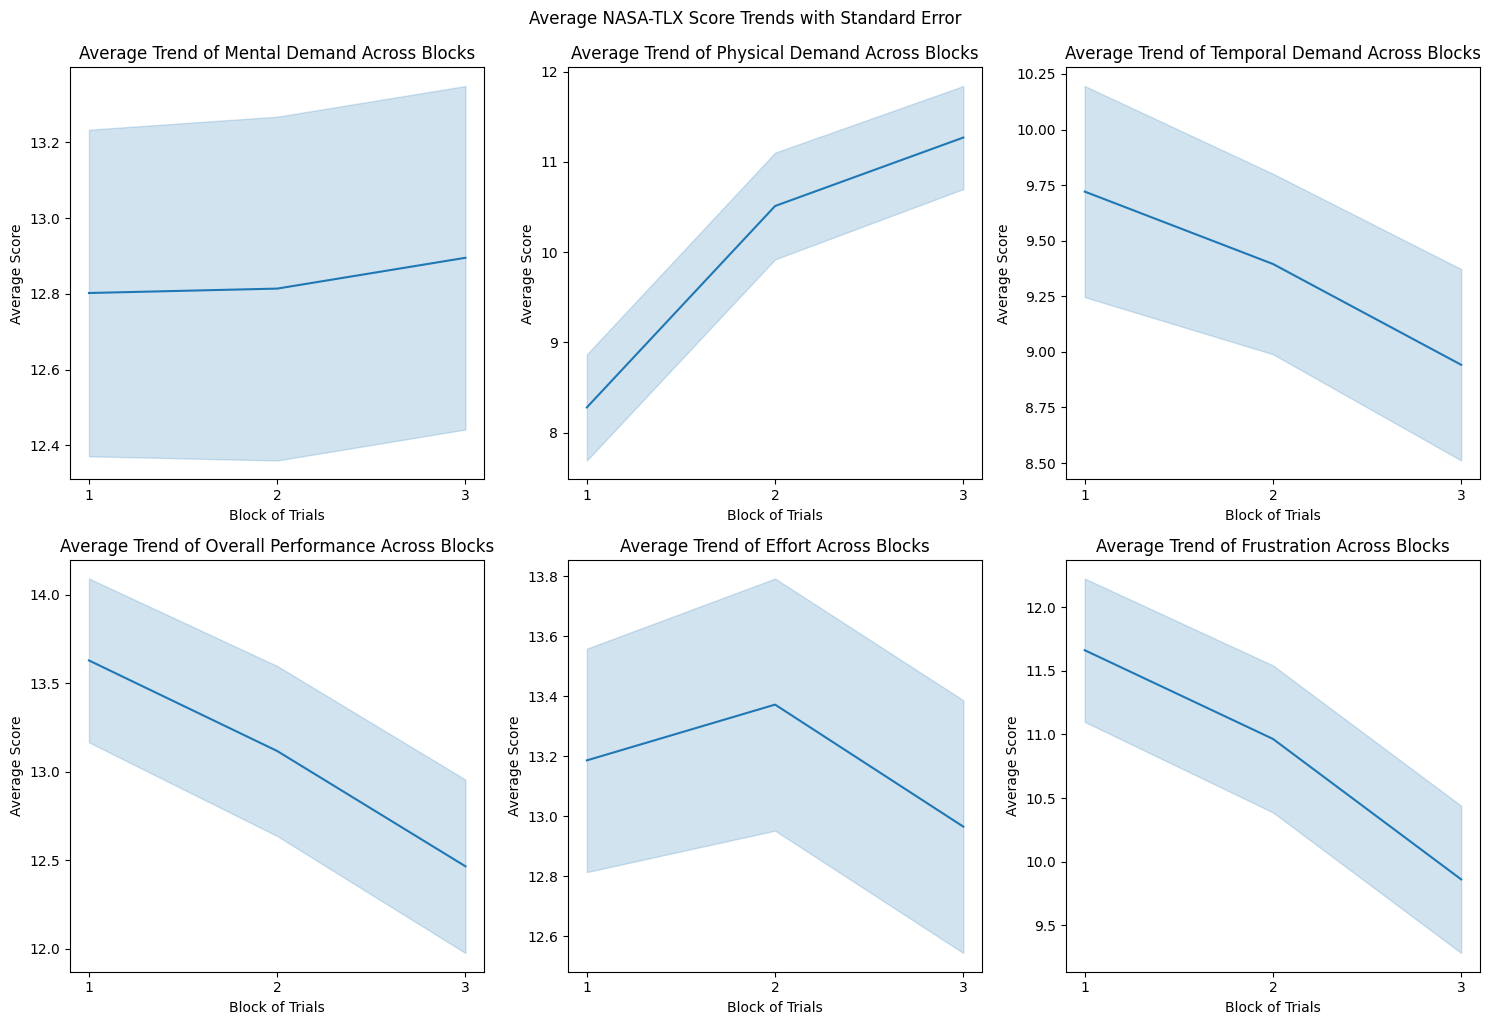

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file
try:
    df = pd.read_csv('/content/participants.tsv', sep='\t')
except FileNotFoundError:
    print("Error: '/content/participants.tsv' not found.")
    exit()

# Identify NASA-TLX scales
nasa_tlx_scales = {
    'NASA_cog': 'Mental Demand',
    'NASA_phys': 'Physical Demand',
    'NASA_speed': 'Temporal Demand',
    'NASA_perf': 'Overall Performance',
    'NASA_effort': 'Effort',
    'NASA_dissap': 'Frustration'
}

# Create average trend plots with standard error
plt.figure(figsize=(15, 10))
for i, (prefix, scale_name) in enumerate(nasa_tlx_scales.items()):
    plt.subplot(2, 3, i + 1)
    melted_df = pd.melt(df, id_vars=['participant_id'],
                        value_vars=[f'{prefix}_1', f'{prefix}_2', f'{prefix}_3'],
                        var_name='time_point', value_name='score')
    melted_df['time_point'] = melted_df['time_point'].str[-1].astype(int)
    sns.lineplot(data=melted_df, x='time_point', y='score', errorbar='se') # 'se' for standard error, 'sd' for standard deviation
    plt.title(f'Average Trend of {scale_name} Across Blocks')
    plt.xlabel('Block of Trials')
    plt.ylabel('Average Score')
    plt.xticks([1, 2, 3])
plt.tight_layout()
plt.suptitle('Average NASA-TLX Score Trends with Standard Error', y=1.02)
plt.show()

Correlation between NASA_effort_avg and NASA_dissap_avg: 0.51


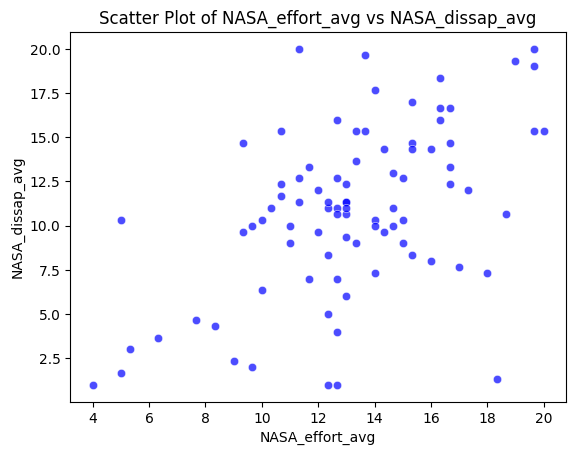

In [ ]:
# Calculate averages if not already done
nasa_columns = {
    'NASA_effort': ['NASA_effort_1', 'NASA_effort_2', 'NASA_effort_3'],
    'NASA_dissap': ['NASA_dissap_1', 'NASA_dissap_2', 'NASA_dissap_3']
}

# Compute averages
for key, cols in nasa_columns.items():
    data[f'{key}_avg'] = data[cols].mean(axis=1)

# Correlation analysis
effort_avg = data['NASA_effort_avg']
dissap_avg = data['NASA_dissap_avg']

# Compute correlation
correlation = effort_avg.corr(dissap_avg)
print(f"Correlation between NASA_effort_avg and NASA_dissap_avg: {correlation:.2f}")

# Visualization
import matplotlib.pyplot as plt
sns.scatterplot(x=effort_avg, y=dissap_avg, color='blue', alpha=0.7)
plt.title('Scatter Plot of NASA_effort_avg vs NASA_dissap_avg')
plt.xlabel('NASA_effort_avg')
plt.ylabel('NASA_dissap_avg')
plt.show()


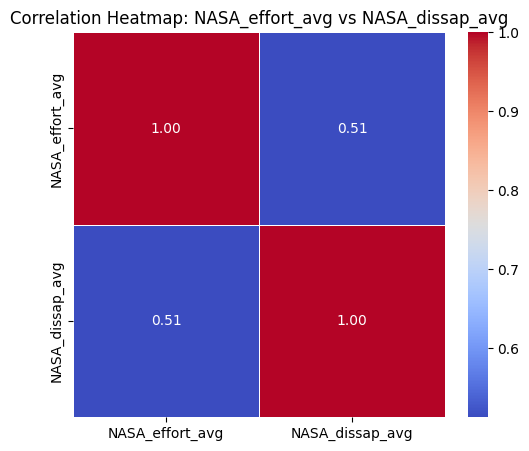

In [ ]:
#correlation between NASA_effort_avg and NASA_dissap_avg
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the relevant columns
correlation_data = data[['NASA_effort_avg', 'NASA_dissap_avg']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: NASA_effort_avg vs NASA_dissap_avg')
plt.show()


In [ ]:
# Filter participants who are male
male_participants = data[data['sex'] == 'm']

# Display the list of participant IDs line by line
print("List of male participants:")
for participant in male_participants['participant_id']:
    print(participant)


List of male participants:
sub-013
sub-017
sub-020
sub-027
sub-037
sub-041
sub-056
sub-067
sub-087
sub-091
sub-093
sub-097


In [ ]:
# Filter participants who are left-handed or ambidextrous
left_and_ambi_participants = data[(data['hand'] == 'l') | (data['hand'] == 'a')]

# Display the list of participant IDs line by line
print("List of left-handed and ambidextrous participants:")
for participant in left_and_ambi_participants['participant_id']:
    print(participant)




List of left-handed and ambidextrous participants:
sub-035
sub-056
sub-057
sub-059
sub-070
sub-085
